# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [2]:
from scipy import stats 
import numpy as np

In [3]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [4]:
from scipy.stats             import ttest_1samp
import scipy.stats as stats
print("ho: mean = 0  ; ha: mean != 0 ")
print("alpha=0.05 ")
t_statistic, p_value = ttest_1samp(GPU1, 0)
print("t_statistic, p_value")
print(t_statistic, p_value)


ho: mean = 0  ; ha: mean != 0 
alpha=0.05 
t_statistic, p_value
34.056241516158195 7.228892044970457e-15


## So Since p-value is very less than alpha, we can reject null hypothesis ho. and accept the ha proposed.

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [7]:
print("Ho :MuGPU1 - MuGPU2 =0 ; Ha: MuGPU1 - MuGPU2!=0")
n=15 
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU2)
print('alpha=0.050 and 2 tailed P Value %1.3f' % p_value)  

Ho :MuGPU1 - MuGPU2 =0 ; Ha: MuGPU1 - MuGPU2!=0
alpha=0.050 and 2 tailed P Value 0.014


Since, p value is 0.014 and it is less than 5% level of significance

So the statistical decision is to REJECT the null hypothesis(H0) at 5% level of significance.

So there is sufficient evidence to reject the null hypothesis that there is a significant difference between 2 data sets.¶

## Question 3

He is trying a third GPU - GPU3.

In [8]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [11]:
print("Ho : muGPU1 - muGPU3 =0 ; Ha: muGPU1- muGPU3!=0")
n=15 
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU3)
print('alpha=0.050 and 2 tailed P Value %1.3f' % p_value)  

Ho : muGPU1 - muGPU3 =0 ; Ha: muGPU1- muGPU3!=0
alpha=0.050 and 2 tailed P Value 0.145


Since, 2 tailed p value is 0.145(0.0725 each side) and it is MORE than alpha 0.05 i.e. 5% level of significance

So, the statistical decision is FAILED TO REJECT the null hypothesis(H0) at 5% level of significance.

Thus,there are no sufficient evidence to reject the null hypothesis of having a significant difference between GPU1,3.
Means, Alternate hypothesis is uncertain.

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [17]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [27]:
import pandas            as pd
import numpy             as np
import scipy.stats             as     stats

print("Levene Test's : H0 :var of e1,e2,e3 are same ; Ha: var of e1,e2,e3 are not same. ")
from scipy.stats import levene
statistic,pvalue=levene(e1,e2,e3)
print("statistic" , statistic ,"pvalue:",pvalue)


Levene Test's : H0 :var of e1,e2,e3 are same ; Ha: var of e1,e2,e3 are not same. 
statistic 2.6741725711150446 pvalue: 0.12259792666001798


In [28]:
print("Orignal 𝐻0 : 𝜇e1 = 𝜇e2 = 𝜇e3 ; 𝐻𝐴: At least one 𝜇 differs")

Orignal 𝐻0 : 𝜇e1 = 𝜇e2 = 𝜇e3 ; 𝐻𝐴: At least one 𝜇 differs


Since Levene test results in pvalue(0.12259) >5% significance level, hence, the variance among 3 experiments, is very high. So we can perform anova test on this (since anove assumes the var of all is same.)

Hence, first doing EDT to ensure is 3 means are same Or at least 1 mean differs,

Count, Mean and standard deviation of mean e1:   4, 0.75 and 0.87
Count, Mean and standard deviation of mean e2:   4, 1.70 and 0.67
Count, Mean and standard deviation of mean e3:   4, 0.74 and 0.47


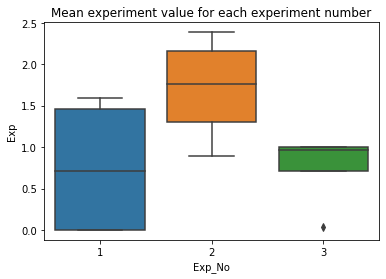

In [38]:
import matplotlib.pyplot as plt
import seaborn           as sns
print('Count, Mean and standard deviation of mean e1: %3d, %3.2f and %3.2f' % (len(e1), e1.mean(),np.std(e1 ,ddof =1)))
print('Count, Mean and standard deviation of mean e2: %3d, %3.2f and %3.2f' % (len(e2), e2.mean(),np.std(e2,ddof =1)))
print('Count, Mean and standard deviation of mean e3: %3d, %3.2f and %3.2f' % (len(e3), e3.mean(),np.std(e3,ddof =1)))

experiment_df = pd.DataFrame()

df1            = pd.DataFrame({'Exp_No': '1', 'Exp':e1})
df2            = pd.DataFrame({'Exp_No': '2', 'Exp':e2})
df3            = pd.DataFrame({'Exp_No': '3', 'Exp':e3})

experiment_df = experiment_df.append(df1) 
experiment_df = experiment_df.append(df2) 
experiment_df = experiment_df.append(df3) 

sns.boxplot(x = "Exp_No", y = "Exp", data = experiment_df)
plt.title('Mean experiment value for each experiment number')
plt.show()

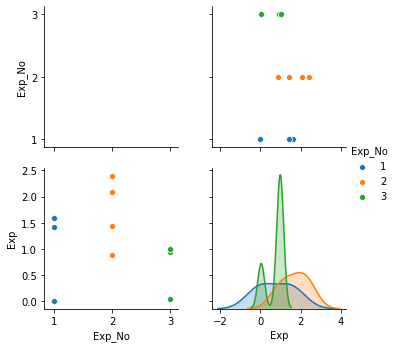

In [37]:
sns.pairplot(experiment_df,diag_kind='kde',hue='Exp_No')

In [ ]:
Hence, we can see that the Experiments have overlapping shapes.

Finally, using Anova to conclude the result.

In [49]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Exp ~ Exp_No', data = experiment_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq   df         F    PR(>F)
Exp_No    2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN


Here, calculated value of P ( =0.135746) is Greater than Alpha value ( = 0.05)

So the statistical decision is FAIL to REJECT the null hypothesis at 5% level of significance.
Hence, we have failed to reject the statment saying mean of 3 experiments are same or similar.
 

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [57]:
statistic, pvalue = stats.f_oneway(e1, e2,e3)
print ("statistic:",statistic,"& pvalue :", pvalue)

statistic: 2.51357622845924 & pvalue : 0.13574644501798466


p value > alpha (0.05) => fail to Reject h0 i.e means are same of similar for 3 experiments.

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type I  Error:
When the decision is Reject H0 but Actually H0 was true.This error is called Type 1 error and is denoted by Alpha.

Type II Error:
When the decision is Donot Reject H0 but Actually H0 was False.This error is called Type II error and is denoted by Beta.

Both Of above errors cannot happen at same time.We need to decide in and env, with type 1,2 error controlled values. 
E.g.Considerring below as our hypothesis, For a judgement made by justice, if decision proves a person guilty when actually he was innocent, this is type 1 error. 
However if, we release a guilty person, failng to proof enough evidence, is type 2 error.
 
Ho: person is innocent
HA: Person is guilty.
We focus on reducing this kind of error more than type2.


## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


#answer here

H0 : Mean of Population = 4.5 min

Ha: Mean of Population !=4.5 min i.e. mean has either increased or decreased from 4.5 minutes.

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [2]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [8]:
import scipy.stats as stats
import scipy

chi2, p, dof, ex = stats.chi2_contingency(dice, correction=True)

print('At 0.01% Threshold value:')

print("chi2 stat =",chi2)
print("p-value=",p)
print("degree of freedom=",dof)
print("contingency=",ex)

print("here p value > threshold 0.01 thus decision is failed to reject null hypothesis")

At 0.01% Threshold value:
chi2 stat = 23.315671914716496
p-value= 0.07766367301496693
degree of freedom= 15
contingency= [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]
here p value > threshold 0.01 thus decision is failed to reject null hypothesis


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [16]:
zscores=stats.zscore(dice, axis=1, ddof=1)
zscores

array([[-0.40824829,  0.81649658, -1.22474487,  0.81649658],
       [ 1.09544512, -0.54772256,  0.54772256, -1.09544512],
       [ 0.1823492 ,  1.15487828, -0.06078307, -1.27644442],
       [-0.59160798,  1.43676223, -0.08451543, -0.76063883],
       [-1.1       ,  1.3       ,  0.1       , -0.3       ],
       [ 0.7406129 , -1.37542395, -0.10580184,  0.7406129 ]])

In [32]:
p_values_1sided = scipy.stats.norm.sf(abs(zscores)) 
print("#one-sided p mean",p_values_1sided.mean())

p_values = scipy.stats.norm.sf(abs(zscores))*2
print("#two-sided p mean ",p_values.mean())

#one-sided p mean 0.2487469049916935
#two-sided p mean  0.497493809983387


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [19]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [31]:
import scipy.stats as stats
statistic,pvalue =stats.ttest_rel(before,after)
print("statistic,pvalue")
statistic, pvalue

statistic,pvalue


(7.406691857464386, 5.561035058947467e-13)

This p value is 2 tailed and equals 5.561035058947467e-13 , which is very less than 0.05% of significance level.
i.e. reject the null hypothesis and thus accept the hA .hence, the weight-loss drug works.

Note: hO: mean of group before and after are same. ha: mean of group before and after are not same.